In [1]:
import torch
import torch.nn as nn
from temporal_encoder import Temporal_Encoder
from spacial_encoder import Spacial_Encoder
from unet_decoder import Unet_Decoder
from data_loader import data_loader
from torch.utils.data import DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt
import os
import pickle
from CNN import plot_losses
from temporal_spacial_encoder_decoder import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

%load_ext autoreload
%autoreload 2

Using device: cuda


In [2]:
!nvidia-smi -L

GPU 0: NVIDIA H100 80GB HBM3 (UUID: GPU-bc57b0c0-3768-c846-18d3-56c15c1bf9fc)


In [3]:
# Set paths
folder_path = os.path.expanduser("~ylu764/scratch")
feature_path = os.path.join(folder_path, "feature/feature")  # Replace with your actual path
label_path = os.path.join(folder_path, "label/label")      # Replace with your actual path

# Load data
dl = data_loader(feature_path, label_path)
dl.check()
train_set, valid_set = torch.utils.data.random_split(dl, [int(len(dl)*0.8), len(dl) - int(len(dl)*0.8)])
train_loader = torch.utils.data.DataLoader(train_set, batch_size=8, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=8, shuffle=False)

In [4]:
temp_config = dict()
spacial_config = dict(in_channels=5, base_features=64, num_layers=4, use_skip=True)
decoder_config = dict(out_channels=1, base_features=64, num_layers=4)

In [5]:
model = FullModel(temp_config=temp_config, 
                  spacial_config=spacial_config,
                  decoder_config=decoder_config)
model.to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

100%|██████████| 1025/1025 [01:35<00:00, 10.78it/s]


[ Train | 001/010 ] loss = 0.024756


100%|██████████| 257/257 [00:15<00:00, 16.35it/s]


[ Valid | 001/010 ] loss = 0.022751
[ Valid | 001/010 ] loss = 0.022751 -> best
Best model found at epoch 0, saving model


100%|██████████| 1025/1025 [01:33<00:00, 10.97it/s]


[ Train | 002/010 ] loss = 0.013422


100%|██████████| 257/257 [00:15<00:00, 16.75it/s]


[ Valid | 002/010 ] loss = 0.015473
[ Valid | 002/010 ] loss = 0.015473 -> best
Best model found at epoch 1, saving model


100%|██████████| 1025/1025 [01:32<00:00, 11.02it/s]


[ Train | 003/010 ] loss = 0.011095


100%|██████████| 257/257 [00:15<00:00, 16.80it/s]


[ Valid | 003/010 ] loss = 0.012154
[ Valid | 003/010 ] loss = 0.012154 -> best
Best model found at epoch 2, saving model


100%|██████████| 1025/1025 [01:32<00:00, 11.04it/s]


[ Train | 004/010 ] loss = 0.010257


100%|██████████| 257/257 [00:15<00:00, 16.41it/s]


[ Valid | 004/010 ] loss = 0.073287
[ Valid | 004/010 ] loss = 0.073287


100%|██████████| 1025/1025 [01:33<00:00, 10.91it/s]


[ Train | 005/010 ] loss = 0.0096512


100%|██████████| 257/257 [00:15<00:00, 16.79it/s]


[ Valid | 005/010 ] loss = 0.048664
[ Valid | 005/010 ] loss = 0.048664


100%|██████████| 1025/1025 [01:33<00:00, 11.00it/s]


[ Train | 006/010 ] loss = 0.0086243


100%|██████████| 257/257 [00:15<00:00, 16.33it/s]


[ Valid | 006/010 ] loss = 0.0087761
[ Valid | 006/010 ] loss = 0.0087761 -> best
Best model found at epoch 5, saving model


100%|██████████| 1025/1025 [01:33<00:00, 10.96it/s]


[ Train | 007/010 ] loss = 0.0083038


100%|██████████| 257/257 [00:15<00:00, 16.37it/s]


[ Valid | 007/010 ] loss = 0.0080736
[ Valid | 007/010 ] loss = 0.0080736 -> best
Best model found at epoch 6, saving model


100%|██████████| 1025/1025 [01:34<00:00, 10.83it/s]


[ Train | 008/010 ] loss = 0.0069255


100%|██████████| 257/257 [00:15<00:00, 16.58it/s]


[ Valid | 008/010 ] loss = 0.024892
[ Valid | 008/010 ] loss = 0.024892


100%|██████████| 1025/1025 [01:34<00:00, 10.90it/s]


[ Train | 009/010 ] loss = 0.0089045


100%|██████████| 257/257 [00:15<00:00, 16.33it/s]


[ Valid | 009/010 ] loss = 0.0073974
[ Valid | 009/010 ] loss = 0.0073974 -> best
Best model found at epoch 8, saving model


100%|██████████| 1025/1025 [01:33<00:00, 10.97it/s]


[ Train | 010/010 ] loss = 0.0062327


100%|██████████| 257/257 [00:15<00:00, 16.48it/s]


[ Valid | 010/010 ] loss = 0.006786
[ Valid | 010/010 ] loss = 0.006786 -> best
Best model found at epoch 9, saving model


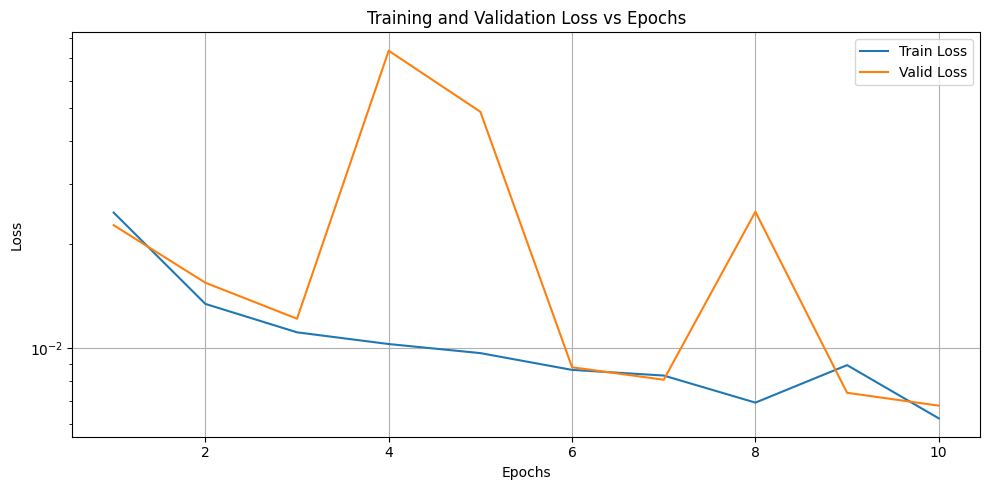

In [6]:
train_losses, valid_losses = train_temporal_spacial_model(model, 
                                                          optimizer, 
                                                          train_loader, 
                                                          valid_loader, 
                                                          n_epochs=10,
                                                          patience=10, 
                                                          criterion=criterion, 
                                                          prefix="TemporalSpacial")
plot_losses(train_losses, valid_losses)

In [7]:
# Print final statistics
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total Trainable Parameters: {total_params}")
print(f"Best Validation MSE Loss: {min(valid_losses):.5f}")

Total Trainable Parameters: 117133889
Best Validation MSE Loss: 0.00679
